# Demo Notebook 1

This notebook adapts content from the pygsp documentation and examples as well as the NTDS 2019 course.

In [160]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from pygsp import graphs, filters
from scipy.io import loadmat

## First basic example : Regular grid graph

In [79]:
G = graphs.Grid2d()
G_small = graphs.Grid2d(N1=5)


# A basic Delta signal on graph
DELTA = 100
x = np.zeros(G.N)
x[DELTA] = 1

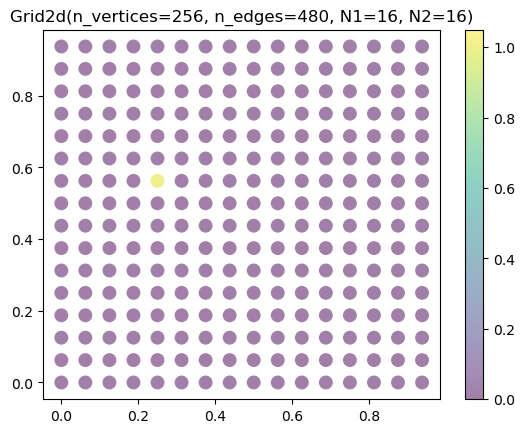

In [164]:
G.plot(x, edges=False);

## Computing the Graph Laplacian 

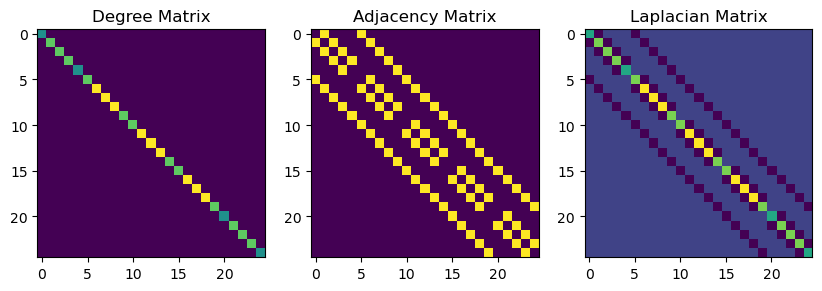

In [81]:
G.compute_laplacian('normalized')
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(np.diag(G_small.d))
plt.title("Degree Matrix")
plt.subplot(132)
plt.imshow(G_small.A.todense())
plt.title("Adjacency Matrix")
plt.subplot(133)
plt.imshow(G_small.L.todense())
plt.title("Laplacian Matrix");

## Computing the Eigendecomposition of the Laplacian, i.e. the Fourier Basis of our graph

In [82]:
G.compute_fourier_basis()

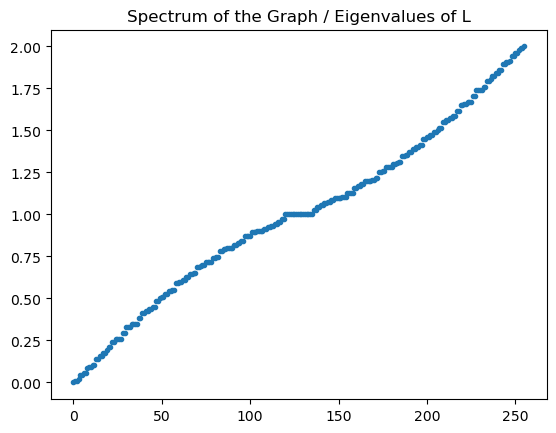

In [83]:
plt.plot(G.e,'.')
plt.title("Spectrum of the Graph / Eigenvalues of L");

In [161]:
G.plotting

{'vertex_size': 100,
 'vertex_color': (0.12, 0.47, 0.71, 0.5),
 'edge_color': (0.5, 0.5, 0.5, 0.5),
 'edge_width': 2,
 'edge_style': '-',
 'highlight_color': 'C1',
 'normalize_intercept': 0.25,
 'limits': array([-0.0625,  1.0625,  0.0625,  1.0625])}

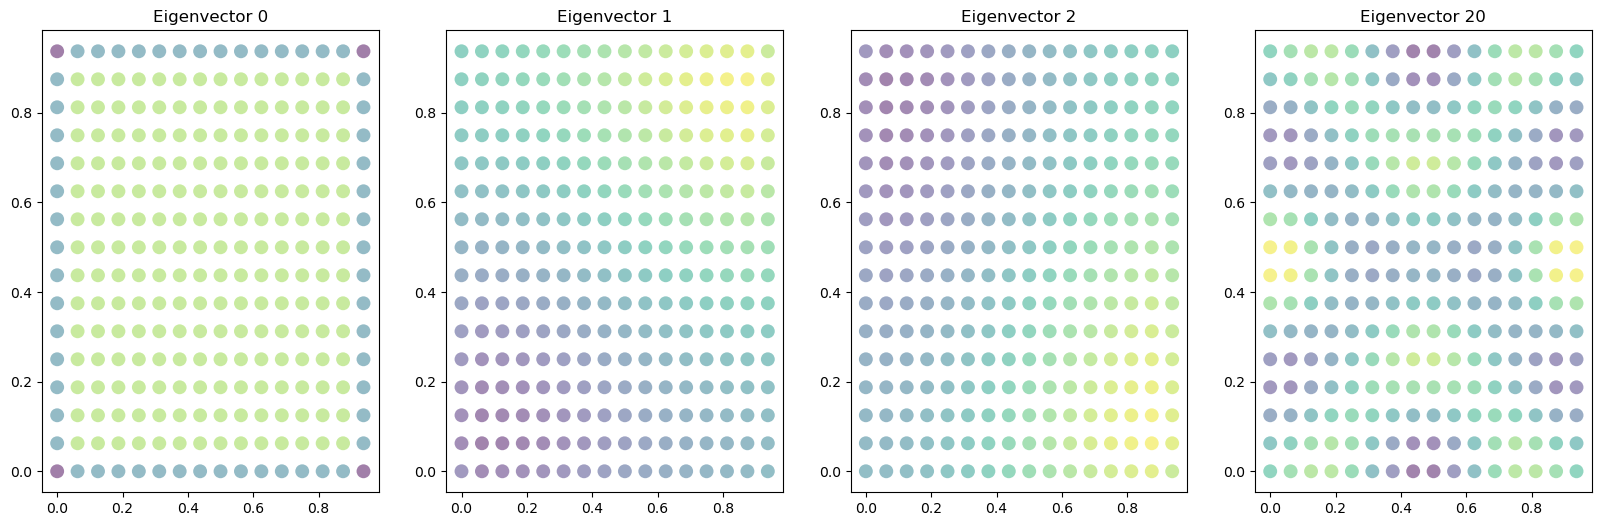

In [84]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

G.plot(G.U[:, 0],edges=False, colorbar=False, title="Eigenvector 0", ax=axes[0])
G.plot(G.U[:, 1],edges=False, colorbar=False, title="Eigenvector 1", ax=axes[1])
G.plot(G.U[:, 2],edges=False, colorbar=False, title="Eigenvector 2", ax=axes[2])
G.plot(G.U[:, 20],edges=False, colorbar=False, title="Eigenvector 20", ax=axes[3]);

## Fourier Transform of Signal


Need one/multiple example signals with low/high frequencies

In [87]:
scs = loadmat("/Users/hugofluhr/DATA/CHUV/connectomes/Individual_Connectomes.mat")

Need coordinates to plot brains

In [156]:
sc = scs.get('connMatrices')[0][0][1][3][0][...,1]

In [157]:
sc.shape

(448, 448)

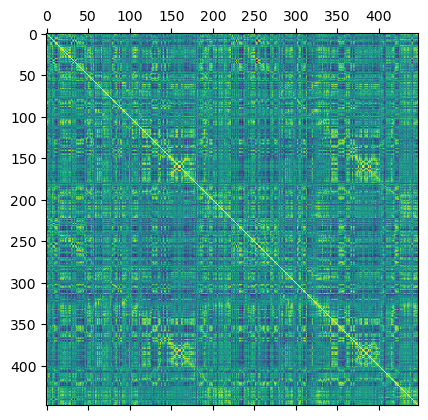

In [159]:
plt.matshow(sc)